# Problem 1: PCA vs least squares

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse.linalg import svds
import pandas as pd

In [3]:
def pca_recover(x,y):
    X = np.column_stack((x,y))
    X_centered = X - np.mean(X, axis=0)
    U, S, Vt = svds(X_centered, k=1)
    principal_component = Vt[0]

    return principal_component[1] / principal_component[0]

def ls_recover(x,y):
    return (x - np.mean(x)) @ (y - np.mean(y)) / np.sum((x - np.mean(x))**2)

In [126]:
n = 1000
sigma = 100
x = np.random.choice([sigma, -sigma], size=n)
y = np.random.choice([sigma, -sigma], size=n)
print(pca_recover(x,y))
print(ls_recover(x,y))

-0.999999999999991
-0.04324990792781529


In [4]:
x = np.linspace(0.001, 1, 1000)
y = 3 * x
print(pca_recover(x,y))
print(ls_recover(x,y))

3.000000000000004
3.0


In [28]:
sigmas = np.linspace(0, 0.5, 10)
pca_noisy_y = np.zeros((10,40))
ls_noisy_y = np.zeros((10,40))
for i in range(len(sigmas)):
    for j in range(40):
        y_tilde = 3*x + np.random.normal(scale=sigmas[i], size=1000)
        pca_noisy_y[i,j] = pca_recover(x,y_tilde)
        ls_noisy_y[i,j] = ls_recover(x,y_tilde)

[0.         0.05555556 0.11111111 0.16666667 0.22222222 0.27777778
 0.33333333 0.38888889 0.44444444 0.5       ]


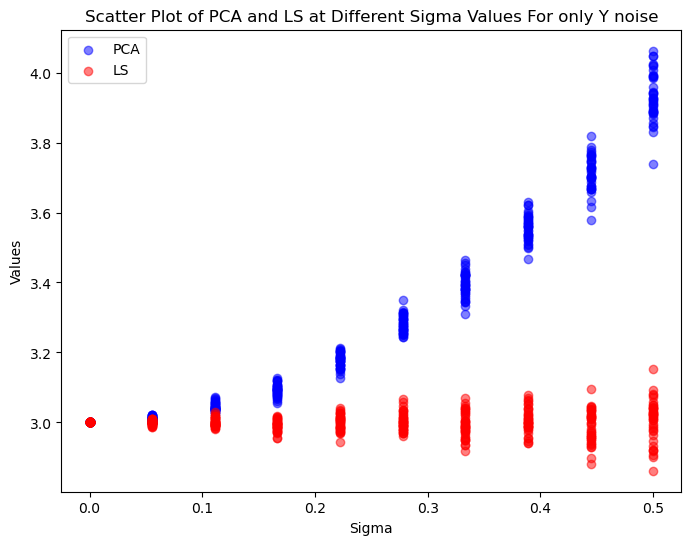

In [6]:
# Create scatter plot
plt.figure(figsize=(8, 6))

for i, sigma in enumerate(sigmas):
    plt.scatter([sigma] * 40, pca_noisy_y[i, :], color='blue', alpha=0.5, label="PCA" if i == 0 else "")
    plt.scatter([sigma] * 40, ls_noisy_y[i, :], color='red', alpha=0.5, label="LS" if i == 0 else "")

# Labels and title
plt.xlabel("Sigma")
plt.ylabel("Values")
plt.title("Scatter Plot of PCA and LS at Different Sigma Values For only Y noise")
plt.legend()

# Show plot
plt.show()

In [7]:
pca_noisy_both = np.zeros((10,40))
ls_noisy_both = np.zeros((10,40))
for i in range(len(sigmas)):
    for j in range(40):
        x_tilde = x + np.random.normal(scale=sigmas[i], size=1000)
        y_tilde = 3*x + np.random.normal(scale=sigmas[i], size=1000)
        pca_noisy_both[i,j] = pca_recover(x_tilde, y_tilde)
        ls_noisy_both[i,j] = ls_recover(x_tilde, y_tilde)

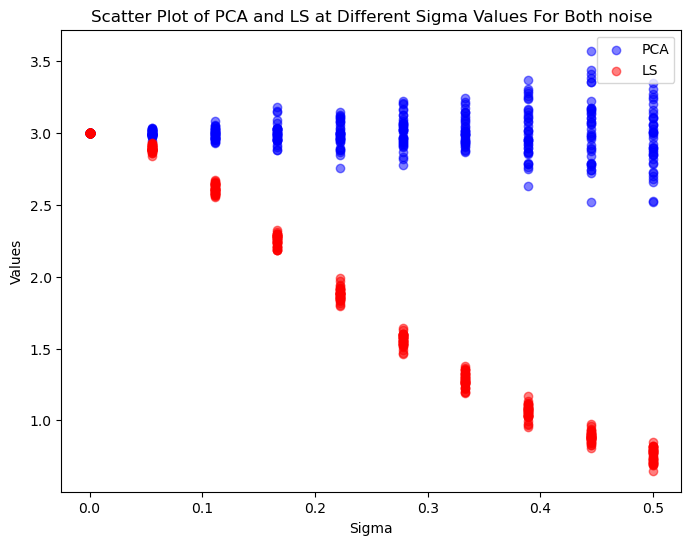

In [8]:
# Create scatter plot
plt.figure(figsize=(8, 6))

for i, sigma in enumerate(sigmas):
    plt.scatter([sigma] * 40, pca_noisy_both[i, :], color='blue', alpha=0.5, label="PCA" if i == 0 else "")
    plt.scatter([sigma] * 40, ls_noisy_both[i, :], color='red', alpha=0.5, label="LS" if i == 0 else "")

# Labels and title
plt.xlabel("Sigma")
plt.ylabel("Values")
plt.title("Scatter Plot of PCA and LS at Different Sigma Values For Both noise")
plt.legend()

# Show plot
plt.show()

# PCA for Genetic Data

### 2(a)

In [9]:
df = pd.read_csv('pca-data.txt', sep=' ', header=None)
df = df.astype('category')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,10094,10095,10096,10097,10098,10099,10100,10101,10102,10103
0,HG01879,1,ACB,G,G,T,T,A,A,C,...,T,A,T,A,A,T,T,T,G,A
1,HG01880,2,ACB,A,A,T,T,A,G,C,...,G,C,T,G,A,T,C,T,G,G
2,HG01881,2,ACB,A,A,T,T,A,A,G,...,G,C,T,G,A,T,C,T,G,G
3,HG01882,1,ACB,A,A,T,C,A,A,G,...,G,A,T,G,A,T,C,T,G,G
4,HG01883,2,ACB,G,A,T,C,G,A,C,...,G,C,T,G,A,T,C,T,G,G


In [10]:
genome_data = df.iloc[:, 3:]
most_common_genomes = genome_data.mode().iloc[0]
most_common_genomes.head()

3    G
4    A
5    T
6    C
7    A
Name: 0, dtype: object

In [11]:
mutation_matrix = (genome_data != most_common_genomes).astype(int)
X = mutation_matrix.to_numpy()
print(X)

[[0 1 0 ... 0 0 1]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 1 ... 0 0 0]
 [0 1 1 ... 0 0 0]
 [0 1 1 ... 0 0 0]]


In [22]:
X_centered = X - np.mean(X, axis=0)
U, S, Vt = svds(X_centered, k=2)

[104.57041965 115.84520578]


In [13]:
X_proj = X @ Vt.T
populations = df.iloc[:, 2]
populations.head()

0    ACB
1    ACB
2    ACB
3    ACB
4    ACB
Name: 2, dtype: category
Categories (7, object): ['ACB', 'ASW', 'ESN', 'GWD', 'LWK', 'MSL', 'YRI']

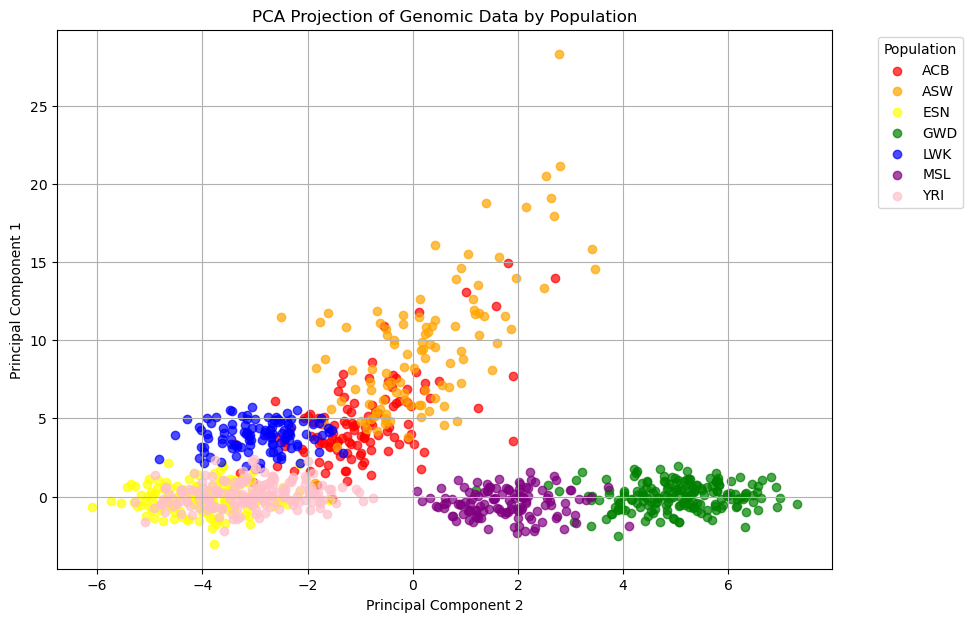

In [23]:
unique_pops = np.unique(populations)
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'pink']
color_map = dict(zip(unique_pops, colors))

# Create scatter plot
plt.figure(figsize=(10, 7))
for pop in unique_pops:
    mask = (populations == pop)  # Boolean mask for each population
    plt.scatter(X_proj[mask, 0], X_proj[mask, 1],
                color=color_map[pop], label=pop, alpha=0.7)

# Labels & Legend
plt.xlabel("Principal Component 2")
plt.ylabel("Principal Component 1")
plt.title("PCA Projection of Genomic Data by Population")
plt.legend(title="Population", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Show plot
plt.show()

### 2(b)
MSL and GWD, being Mende, Sierra Leone and Gambian, Western Division, Mandinka are extremely close geographically, while still being on the African continent. ESN and YRI, being Yoruba in Ibadan, Nigera, and Esan in Nigera, are also clearly both in Nigeria, which explains why they are close in the PCA. Nigeria is very far east from Sierra Leone and Gambia, which explains the distinct spread between the two groups. The blue group, being noticeably above ESN and YRI can be explained since it means kenya, which is far to the east of Nigeria. It is extremely far from the green and purple group because of the large geographical gap between west and east Africa.
The orange and red group, being ACB and ASW, are African Caribbeans in Barbados and Americans of African ancestry are both located in the Americas, namely closer to North America, extremely far away from Africa. This is why there is such a big spread between them and everything else. So it seems that the second PC represents the east/west divide in Africa, and the first represents the America/Africa geographical divide.

### 2(c)

In [20]:
U, S, Vt = svds(X_centered, k=3)
sorted_indices = np.argsort(S)[::-1]
S = S[sorted_indices]
print(np.delete(S, 1, axis=0))
Vt = Vt[sorted_indices]
Vt_reduced = np.delete(Vt, 1, axis=0) # gets only the first and 3rd pc
X_proj_reduced = X @ Vt_reduced.T
print(X_proj_reduced)

[115.84520578  93.85729175]
[[ 6.77276716 -4.56400777]
 [14.93894352 -0.64958691]
 [11.82751565 -0.04039562]
 ...
 [10.73355033  0.48814674]
 [ 8.07196596  0.48999591]
 [ 4.20684228 -4.45849442]]


In [26]:
genders = df.iloc[:, 1]
genders.head()

0    1
1    2
2    2
3    1
4    2
Name: 1, dtype: category
Categories (2, int64): [1, 2]

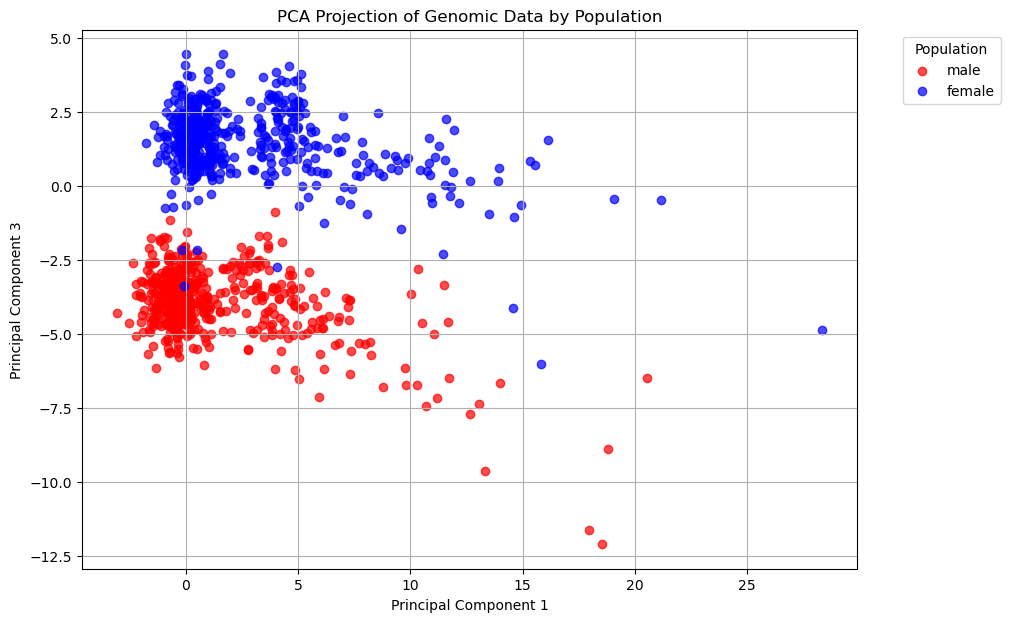

In [27]:
# Create scatter plot
color_map = {1: 'red', 2: 'blue'}
plt.figure(figsize=(10, 7))
for gen in [1,2]:
    mask = (genders == gen)  # Boolean mask for each population
    plt.scatter(X_proj_reduced[mask, 0], X_proj_reduced[mask, 1],
                color=color_map[gen], label='male' if gen == 1 else 'female', alpha=0.7)

# Labels & Legend
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 3")
plt.title("PCA Projection of Genomic Data by Population")
plt.legend(title="Population", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Show plot
plt.show()

### 2(d)
I mean this is as clear as day. The third PC is representative of if the sample was a man or a woman.

### 2(e)
Writing $$
\tilde{X} =
\begin{bmatrix}
X \\
x^T
\end{bmatrix}
$$
We can see that $\tilde{X}^T X = X^TX + xx^T$. Expanding $X^TX = \sum_i \sigma_i^2 v_iv_i^T$, we can make the second term the same size as the first term by taking $x = \sqrt{\sigma_1^2 - \sigma_2^2} v_2$.